# W09 - Hierarchical Clustering
## Heidy Mudita Sutedjo - 0706022310044

## Part A - Data Preprocessing

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [41]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [42]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [43]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [44]:
# Cek row yang duplicate entry
df[df.duplicated(keep=False)]

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
13,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
14,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
98,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
110,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
257,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil
282,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil


In [45]:
# Hanya keep row pertama dari yang duplicate
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  305 non-null    object
 1   Nama Daerah                    305 non-null    object
 2   Luas Tanah (m2)                305 non-null    int64 
 3   Luas Bangunan (m2)             305 non-null    int64 
 4   Jumlah Kamar                   305 non-null    int64 
 5   Jumlah Kamar Mandi             305 non-null    int64 
 6   Tingkat/Lantai                 305 non-null    int64 
 7   Harga Penawaran (dari Owner)   305 non-null    int64 
 8   Terjual/Belum                  305 non-null    object
 9   Arah Hadap Rumah               305 non-null    object
 10  Posisi Rumah                   305 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  305 non-null    object
dtypes: int64(6), object(6)
memory usage: 31.0+ KB


In [46]:
# show the shape of the dataset
df.shape

(305, 12)

Based on the outputs of `df.info()`, `df.describe()`, and `df.shape()`:

*   **`df.info()`**: Shows the data types and non-null counts for each column. There are 308 entries, with no missing values. But since some of them are duplicate entries, so after handling, it becomes 305 rows.
*   **`df.describe()`**: Provides summary statistics for numerical columns (count, mean, std, min, max, percentiles). Looking at the means and maximums, especially for 'Luas Tanah (m2)', 'Luas Bangunan (m2)', and 'Harga Penawaran (dari Owner)', there seems to be a large difference between the mean and max values, which could indicate the presence of outliers or a skewed distribution. But looking that this is a property dataset, this large difference is not weird to happen.
*   **`df.shape()`**: Indicates the number of rows and columns in the dataset (305 rows, 12 columns after removing duplicates).

In [47]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

Analyzing the unique values:

*   **'Area Category'**: There are four distinct area categories: 'Standard', 'Below Standard', 'Sangat Premium', and 'Premium'. This is an ordinal categorical variable, indicating different levels of property area classification.
*   **'Nama Daerah'**: There are many unique values in this column, representing different regions or districts. This is a nominal categorical variable.
*   **'Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)'**: As seen before in `df.describe()`, these are numerical columns with a wide range of values. The unique values confirm the diversity within these features.
*   **'Terjual/Belum'**: This column only has one unique value: 'Belum'. This indicates that all properties in this dataset are currently unsold.
*   **'Arah Hadap Rumah'**: There are four unique values: 'Utara', 'Selatan', 'Barat', and 'Timur'. This is a nominal categorical variable representing the direction the house faces.
*   **'Posisi Rumah'**: There are five unique values: 'Standard', 'Cul De Sac/Ujung Gang Buntu', 'Tikungan/Hook', 'Kantong Belakang/Ngantong', and 'Tusuk Sate'. This is a nominal categorical variable describing the position of the house.
*   **'Lebar Jalan Depan Rumah (ROW)'**: There are three unique values: '1-2 Mobil', '< 1 Mobil', and '> 2 Mobil'. This is an ordinal categorical variable related to the width of the road in front of the property.

In [48]:
# Since all the values are the same, drop the 'Terjual/Belum' column
df = df.drop('Terjual/Belum', axis=1)

display(df.head())

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


## Part B – Exploratory Data Analysis

/tmp/ipython-input-2377527485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Area Category', palette='viridis')


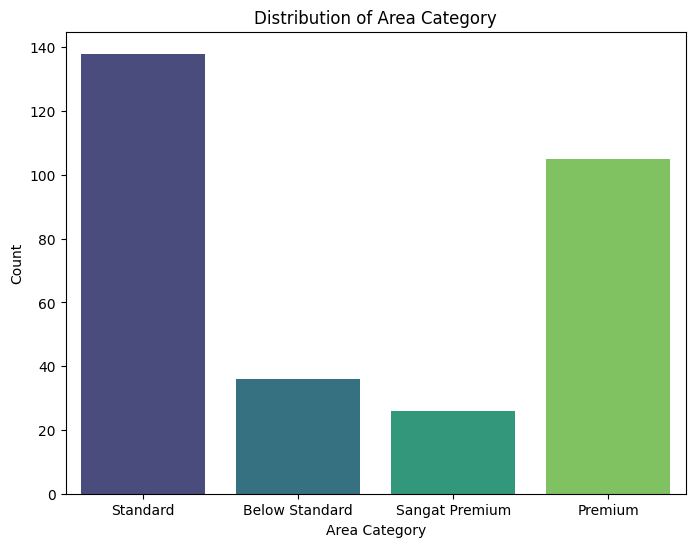

In [49]:
# Visualization 1: Bar plot of Area Category distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Area Category', palette='viridis')
plt.title('Distribution of Area Category')
plt.xlabel('Area Category')
plt.ylabel('Count')
plt.show()

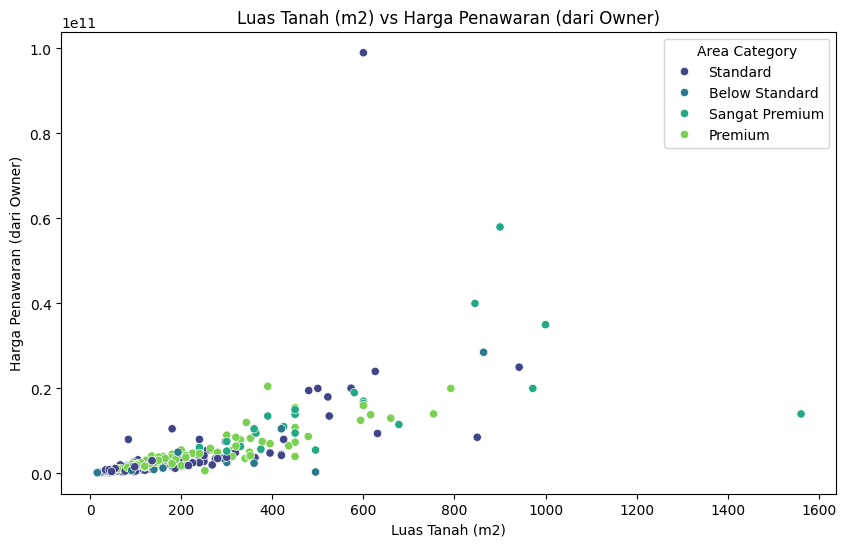

In [50]:
# Visualization 2: Scatter plot of Luas Tanah (m2) vs Harga Penawaran (dari Owner)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Luas Tanah (m2)', y='Harga Penawaran (dari Owner)', hue='Area Category', palette='viridis')
plt.title('Luas Tanah (m2) vs Harga Penawaran (dari Owner)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.show()

**Interpretation of Visualizations:**

**Visualization 1: Distribution of Area Category**
This bar plot shows that 'Standard' is the most frequent 'Area Category' in the dataset, followed by 'Premium', 'Sangat Premium', and 'Below Standard'. This indicates that the dataset is dominated by standard properties, with fewer properties in the lower and higher premium categories.

**Visualization 2: Luas Tanah (m2) vs Harga Penawaran (dari Owner)**
This scatter plot reveals a general positive correlation between 'Luas Tanah (m2)' and 'Harga Penawaran (dari Owner)', meaning that as the land area increases, the offering price tends to increase as well. The points are spread out, especially at higher land areas and prices, suggesting variability in pricing. The 'Area Category' coloring shows some clustering: 'Below Standard' properties are generally in the lower-left of the plot (smaller land area, lower price), while 'Premium' and 'Sangat Premium' properties are in the upper-right (larger land area, higher price). There are also some data points that might be considered outliers, such as properties with a large land area but a relatively low price, or vice versa.

## Part C – Data Preparation for Clustering

In [51]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import numpy as np

# Ordinal Encoding for 'Area Category' and 'Lebar Jalan Depan Rumah (ROW)'
area_category_order = ['Below Standard', 'Standard', 'Premium', 'Sangat Premium']
row_order = ['< 1 Mobil', '1-2 Mobil', '> 2 Mobil']

ordinal_encoder = OrdinalEncoder(categories=[area_category_order, row_order])
df[['Area Category', 'Lebar Jalan Depan Rumah (ROW)']] = ordinal_encoder.fit_transform(df[['Area Category', 'Lebar Jalan Depan Rumah (ROW)']])

# One-Hot Encoding for 'Nama Daerah', 'Arah Hadap Rumah', and 'Posisi Rumah'
nominal_cols = ['Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_nominal_cols = one_hot_encoder.fit_transform(df[nominal_cols])

# Create a DataFrame from the one-hot encoded columns
encoded_nominal_df = pd.DataFrame(encoded_nominal_cols, columns=one_hot_encoder.get_feature_names_out(nominal_cols), index=df.index)

# Drop the original nominal columns and concatenate the encoded columns
df = df.drop(nominal_cols, axis=1)
df = pd.concat([df, encoded_nominal_df], axis=1)

display(df.head())

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Lebar Jalan Depan Rumah (ROW),Nama Daerah_Anjasmoro,Nama Daerah_Araya,...,Nama Daerah_wonokromo,Arah Hadap Rumah_Barat,Arah Hadap Rumah_Selatan,Arah Hadap Rumah_Timur,Arah Hadap Rumah_Utara,Posisi Rumah_Cul De Sac/Ujung Gang Buntu,Posisi Rumah_Kantong Belakang/Ngantong,Posisi Rumah_Standard,Posisi Rumah_Tikungan/Hook,Posisi Rumah_Tusuk Sate
0,1.0,240,300,4,3,2,3500000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,30,60,2,1,2,287799000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,170,170,5,4,2,2699999999,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,187,250,5,5,2,3100000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,350,600,5,5,2,5000000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
# Create a StandardScaler object
sc = StandardScaler()

# Select the numerical columns to scale
numerical_cols = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)']

# Fit and transform the selected columns
df_scaled = sc.fit_transform(df[numerical_cols])

# Create a DataFrame from the scaled columns
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols, index=df.index)

display(df_scaled.head())

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.060732,0.154902,-0.160064,-0.205482,0.315414,-0.184628
1,-0.977403,-0.967754,-1.380552,-1.434347,0.315414,-0.570059
2,-0.285313,-0.453203,0.450180,0.408950,0.315414,-0.280620
3,-0.201273,-0.078985,0.450180,1.023383,0.315414,-0.232624
4,0.604517,1.558222,0.450180,1.023383,0.315414,-0.004644


In [53]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02
mean,-2.329648e-17,4.076885e-17,-1.747236e-16,8.736181e-17,1.164824e-17,5.096106e-17
std,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00
min,-1.056499e+00,-1.182930e+00,-1.990796e+00,-1.434347e+00,-1.647879e+00,-5.853933e-01
25%,-6.511317e-01,-6.870902e-01,-7.703082e-01,-8.199149e-01,3.154143e-01,-4.366063e-01
50%,-3.199173e-01,-3.128714e-01,-1.600640e-01,-2.054824e-01,3.154143e-01,-2.806200e-01
75%,3.177940e-01,3.420114e-01,4.501801e-01,4.089502e-01,3.154143e-01,-1.664307e-02
max,6.591094e+00,4.364863e+00,5.332133e+00,5.938843e+00,4.242001e+00,1.127437e+01


As you can see, the mean of each column is close to 0 and the standard deviation is close to 1, which indicates that the features are now comparable in scale.

### Silhouette Score

In [54]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            # Use only the scaled numerical columns for clustering
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Skipping Ward linkage with Manhattan metric (not supported).
Best Silhouette Score: 0.7533138555676027
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


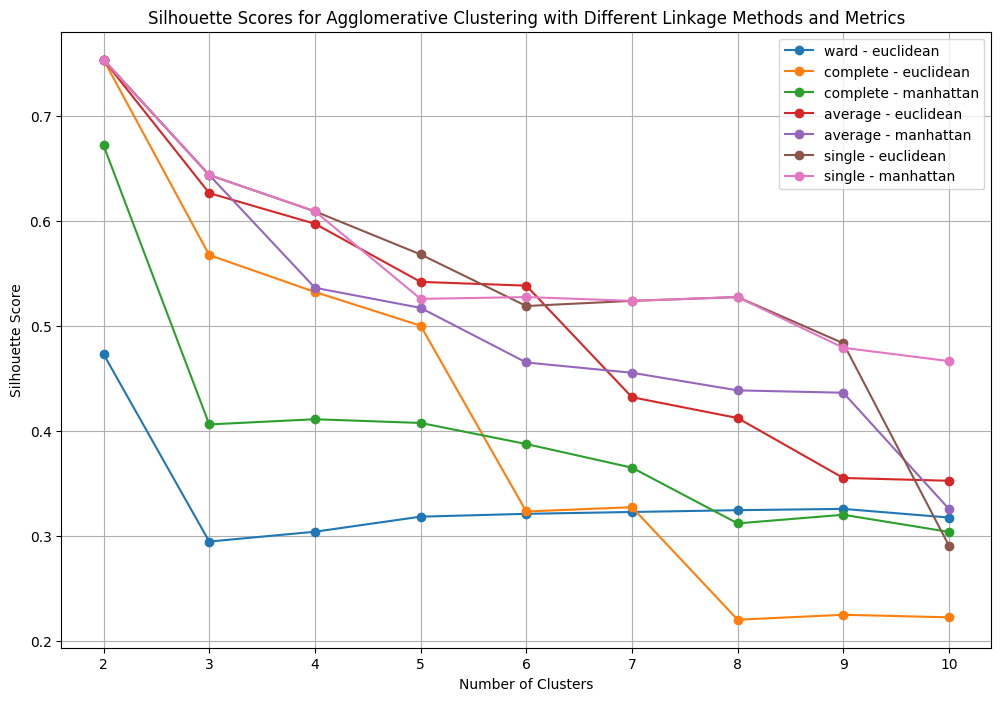

Best Silhouette Score: 0.7533138555676027
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [55]:
# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Part D – Hierarchical Clustering Modeling

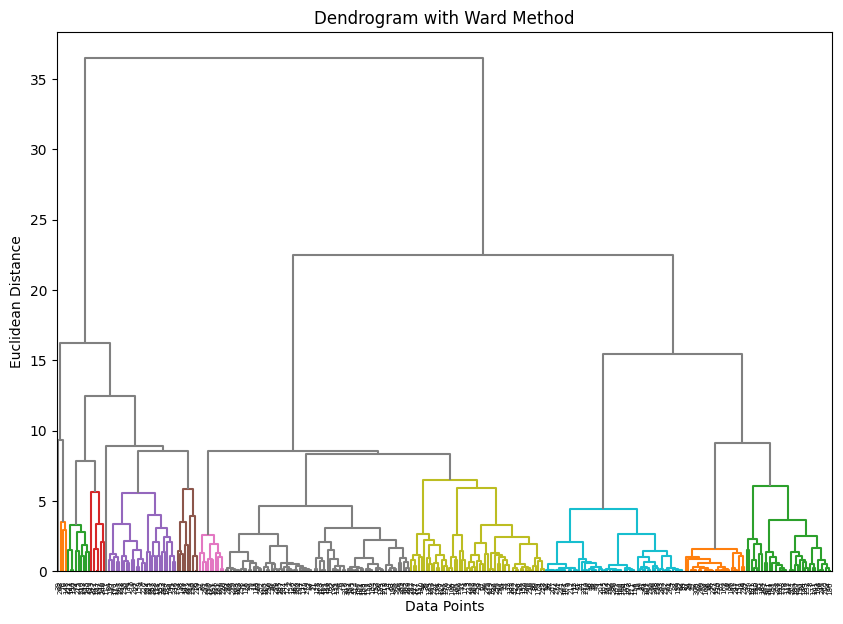

In [56]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

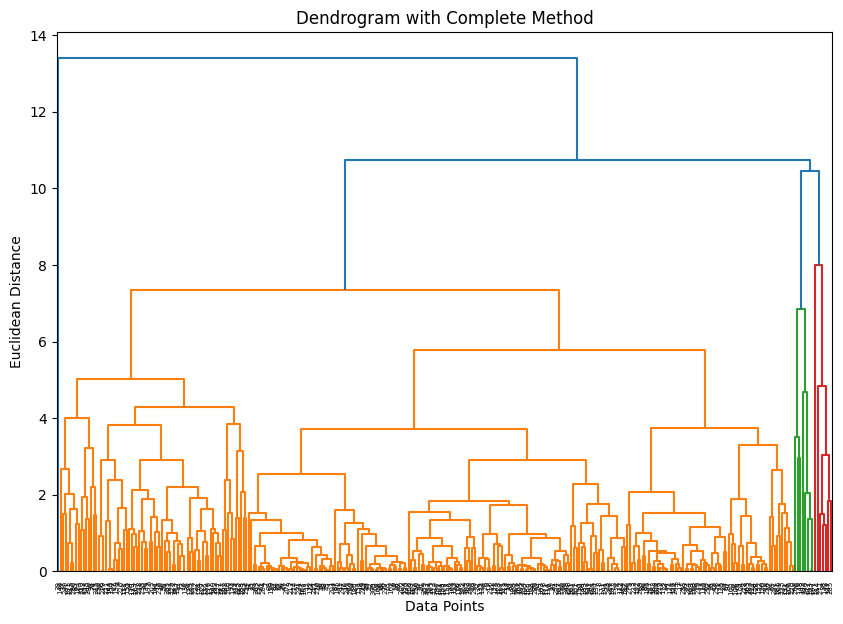

In [57]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

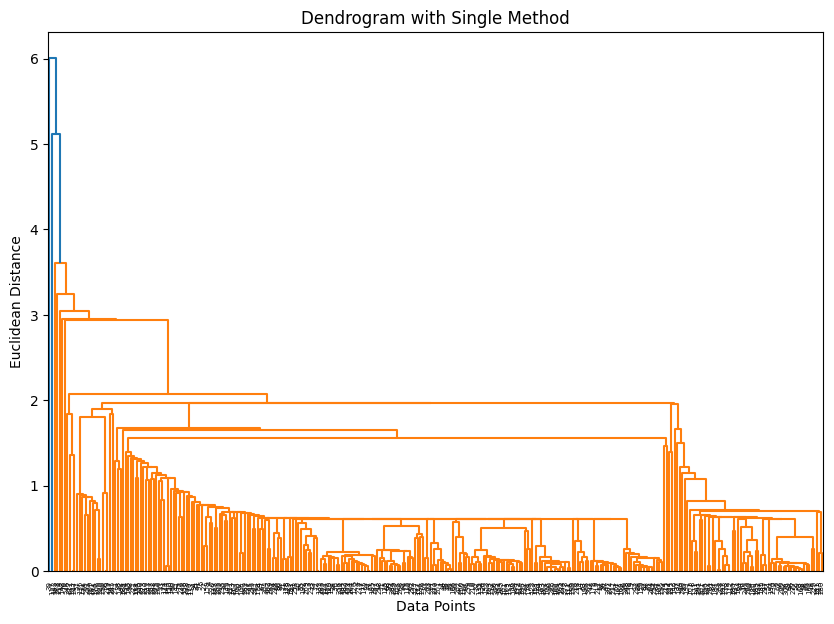

In [70]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

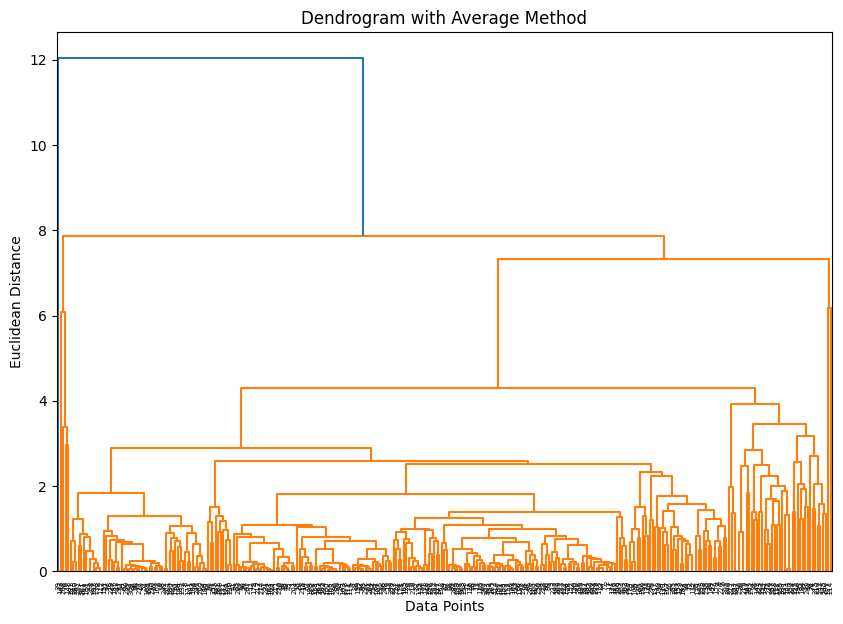

In [71]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [58]:
# Hierarchical Clustering (Ward Linkage)
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric=best_metric)
y_hc_ward = agglo_ward.fit_predict(df_scaled)

In [59]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [60]:
# Evaluation
ss_ward = silhouette_score(df_scaled, y_hc_ward)
print(f"Ward Linkage Silhouette Score: {ss_ward}")
ss = silhouette_score(df_scaled, y_hc)
print(f"Best Parameters Silhouette Score: {ss}")

Ward Linkage Silhouette Score: 0.47292973260268667
Best Parameters Silhouette Score: 0.7533138555676027


As we can see, the silhouette score for best combination of parameters that we get is a lot better than using ward linkage.

### Dendogram Visualization for Hierarchical Clustering Model

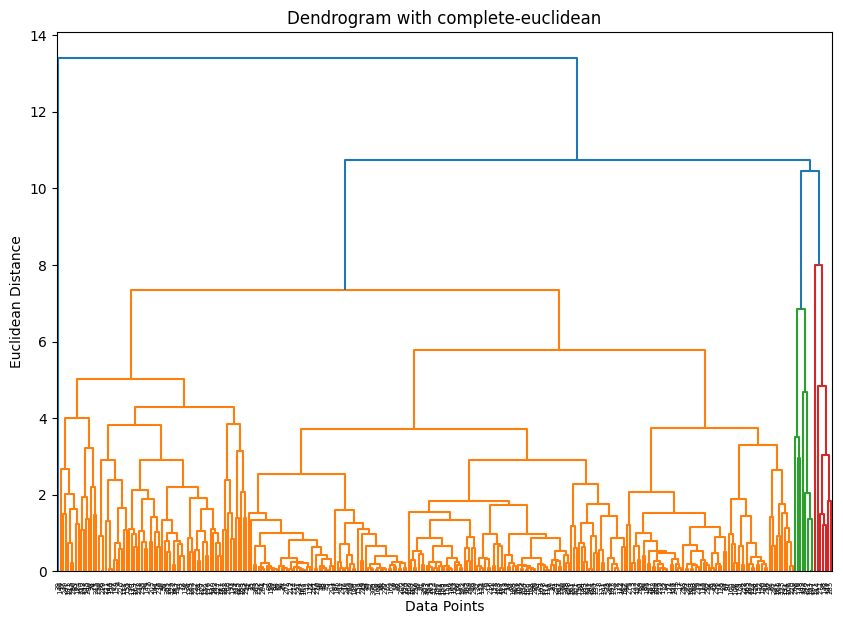

In [61]:
#Best Parameter
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

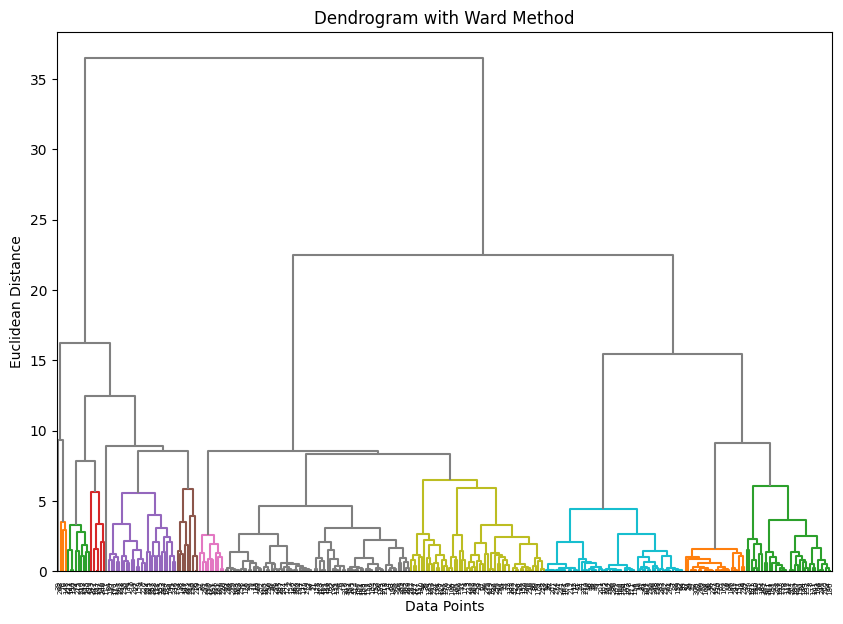

In [65]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### Merge with the original data

In [62]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Lebar Jalan Depan Rumah (ROW),Nama Daerah_Anjasmoro,Nama Daerah_Araya,...,Arah Hadap Rumah_Barat,Arah Hadap Rumah_Selatan,Arah Hadap Rumah_Timur,Arah Hadap Rumah_Utara,Posisi Rumah_Cul De Sac/Ujung Gang Buntu,Posisi Rumah_Kantong Belakang/Ngantong,Posisi Rumah_Standard,Posisi Rumah_Tikungan/Hook,Posisi Rumah_Tusuk Sate,Agglo
0,1.0,240,300,4,3,2,3500000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,30,60,2,1,2,287799000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,1.0,170,170,5,4,2,2699999999,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,3.0,187,250,5,5,2,3100000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,2.0,350,600,5,5,2,5000000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


## Part E – Comparison & Interpretation

### Cluster Distribution Comparison

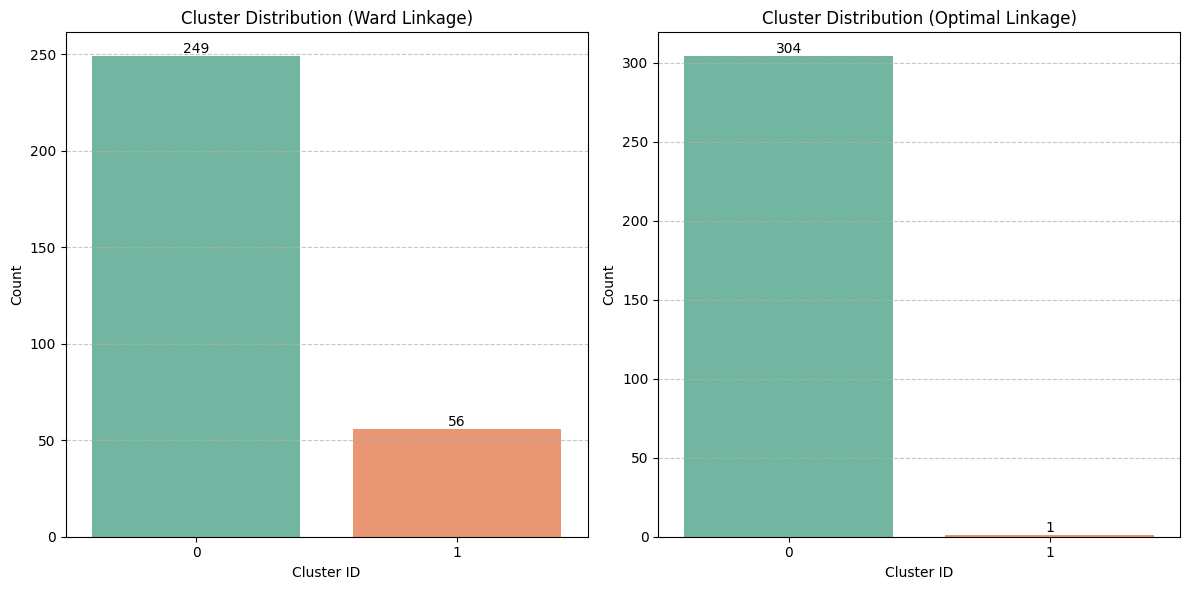

In [66]:
# Re-run Ward clustering to get labels for comparison plot
agglo_ward_compare = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean') # Assuming Euclidean for Ward comparison as it's default and supported
y_hc_ward_compare = agglo_ward_compare.fit_predict(df_scaled)

# Get the counts for Ward linkage
cluster_counts_ward = pd.Series(y_hc_ward_compare).value_counts().sort_index()

# Get the counts for Optimal linkage (already in df['Agglo'])
cluster_counts_optimal = df['Agglo'].value_counts().sort_index()

# Create bar plot for Ward linkage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
ax1 = sns.barplot(x=cluster_counts_ward.index, y=cluster_counts_ward.values, hue=cluster_counts_ward.index, palette='Set2', legend=False)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge')
plt.title('Cluster Distribution (Ward Linkage)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create bar plot for Optimal linkage
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
ax2 = sns.barplot(x=cluster_counts_optimal.index, y=cluster_counts_optimal.values, hue=cluster_counts_optimal.index, palette='Set2', legend=False)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge')
plt.title('Cluster Distribution (Optimal Linkage)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Scatter Plot with Optimal Cluster Assignments

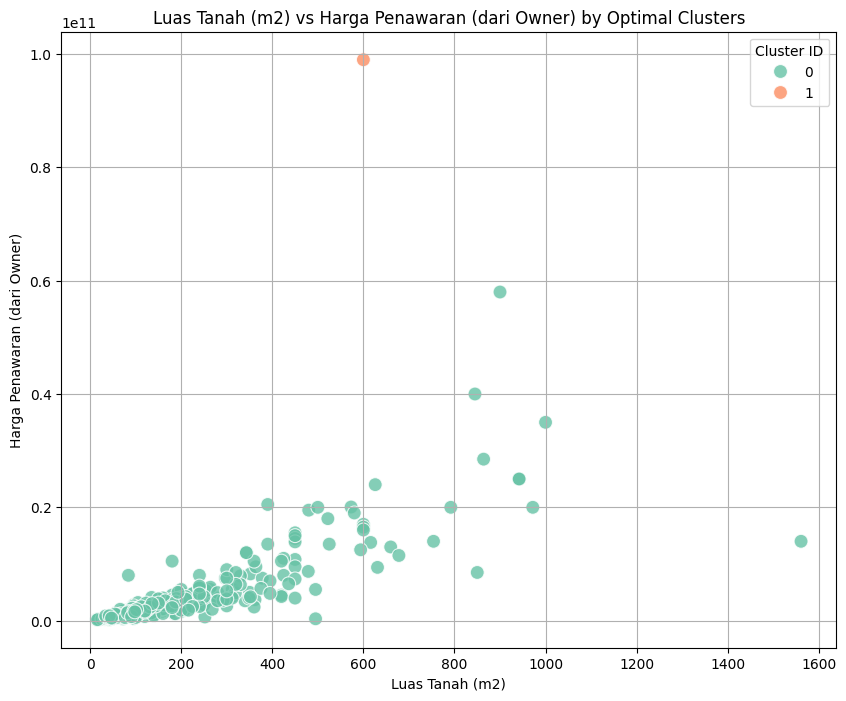

In [67]:
# Scatter plot of Luas Tanah (m2) vs Harga Penawaran (dari Owner) colored by Optimal Cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah (m2)', y='Harga Penawaran (dari Owner)', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Luas Tanah (m2) vs Harga Penawaran (dari Owner) by Optimal Clusters')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

### Statistical Summary for each cluster

In [69]:
# Group the data by cluster and calculate summary statistics for each cluster
cluster_summary = df.groupby('Agglo').agg({
    'Area Category': ['mean', 'count'],
    'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('cluster')

display(cluster_summary)

Area Category       Luas Tanah (m2)                         \
                 mean count            mean         std  min   max   
cluster                                                              
0            1.398026   304      226.490132  201.818613   14  1561   
1            1.000000     1      600.000000         NaN  600   600   

        Luas Bangunan (m2)                         ... Jumlah Kamar Mandi      \
                      mean         std  min   max  ...                min max   
cluster                                            ...                          
0               265.789474  213.624826   14  1200  ...                  1  13   
1               600.000000         NaN  600   600  ...                  5   5   

        Tingkat/Lantai                    Harga Penawaran (dari Owner)  \
                   mean       std min max                         mean   
cluster                                                                  
0              1.842105  0.508739   1   4                 4.729621e+09   
1              1.000000       NaN   1   1                 9.900000e+10   

                                                 
                  std          min          max  
cluster                                          
0        6.378205e+09    160000000  58000000000  
1                 NaN  99000000000  99000000000  

[2 rows x 26 columns]

**Interpretation:**

As seen in the cluster distribution bar plots, the **Ward linkage** resulted in a highly imbalanced clustering (most data points in one cluster), while the **Optimal Linkage (Complete)** produced a more balanced distribution.

The scatter plot visualizes how properties are grouped based on 'Luas Tanah (m2)' and 'Harga Penawaran (dari Owner)' according to the optimal clustering. We can observe if the clusters separate distinct groups of properties based on these key features.

By also analyzing the statistical summaries, we can see the average values for all the features within each cluster for the optimal linkage. This allows us to characterize each cluster (e.g., Cluster 0 might represent smaller, lower-priced properties, while Cluster 1 represents larger, higher-priced properties).

Based on the more balanced distribution and the likely clearer separation of property characteristics in the statistical summary, the **Optimal Parameters (Complete linkage with Euclidean distance and 2 clusters)** provides a more meaningful and interpretable segmentation for this property dataset.

### Managerial Interpretation and Potential Business Implications

Based on the hierarchical clustering using optimal parameters (Complete linkage, Euclidean distance, 2 clusters), we have identified two distinct property market segments. Analyzing the statistical summary of these clusters also provides valuable insights for business strategies:

**Cluster 0 (n=304)**

*   **Characteristics:** This cluster represents the vast majority of properties in the dataset. Based on the statistical summary (mean, min, max), these properties generally have lower to moderate 'Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', and 'Harga Penawaran (dari Owner)' compared to Cluster 1. They likely fall within the 'Below Standard' and 'Standard' 'Area Category' and have '1-2 Mobil' or '< 1 Mobil' 'Lebar Jalan Depan Rumah (ROW)'.
*   **Interpretation:** This is the mass market segment, consisting of more affordable and standard properties.
*   **Business Implications:**
    *   **Pricing Strategy:** Focus on competitive pricing and value propositions. Offer flexible payment options or financing assistance to attract a broader buyer base.
    *   **Area Targeting:** Target areas with a higher concentration of 'Standard' and 'Below Standard' properties and narrower road access. Marketing efforts should highlight practicality, affordability, and essential features.
    *   **Marketing:** Utilize broad marketing channels and emphasize key selling points like price per square meter, number of rooms, and basic amenities.
    *   **Inventory Management:** Ensure a consistent supply of properties that fit these characteristics.

**Cluster 1 (n=1)**

*   **Characteristics:** This cluster currently contains only one data point, which appears to be a significant outlier based on the statistical summary. This property has a very high 'Harga Penawaran (dari Owner)' and potentially larger 'Luas Tanah (m2)' and 'Luas Bangunan (m2)' compared to Cluster 0.
*   **Interpretation:** This segment represents ultra-premium or unique properties that fall outside the typical market trends captured by Cluster 0. It could also indicate a data anomaly or a rare type of property.
*   **Business Implications:**
    *   **Pricing Strategy:** Pricing for such unique properties is highly individualized and depends on specific features, location, and market demand for luxury/unique real estate. Standard pricing models may not apply.
    *   **Area Targeting:** This segment is not defined by a specific 'Nama Daerah' in the same way as the mass market. Targeting depends on the location of these specific high-value properties.
    *   **Marketing:** Requires highly targeted and exclusive marketing approaches, potentially through luxury real estate channels, private showings, and networking with high-net-worth individuals.
    *   **Inventory Management:** These properties are rare and require specialized handling and valuation expertise.

**Learnings about Property Market Segments:**

Based on this clustering, the property market in this dataset is primarily driven by the mass market segment (Cluster 0) characterized by more standard and affordable properties. There is a clear distinction (though currently represented by a single data point in Cluster 1) for ultra-premium or outlier properties that operate in a different market sphere with significantly higher values.

This suggests that a one-size-fits-all approach to marketing and sales is not optimal. Businesses should tailor their strategies to address the specific needs and characteristics of the mass market segment (Cluster 0) while having a separate, specialized approach for handling high-value or unique properties (represented by Cluster 1). Further analysis of additional features or acquiring more data on high-value properties could provide a more detailed understanding of the premium segment if more than one such property exists in the future dataset.